<a href="https://colab.research.google.com/github/DanielCreeklear/Simulacao_misseis/blob/main/Coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm

# Funções

In [2]:
def criarCoordenadas(quantidade, intervalo):
  default_latitude = float(-23.0000001)
  default_longitude = float(-46.0000001)
  latitude = [round(random.uniform(default_latitude, default_latitude - intervalo), 7) for x in range(quantidade)]
  longitude = [round(random.uniform(default_longitude, default_longitude - intervalo), 7) for x in range(quantidade)]
  coordenadas = {'latitude': latitude, 'longitude': longitude}
  df = pd.DataFrame(coordenadas)
  return df

Fórmula para converter Latitude ou Longitude em decimal

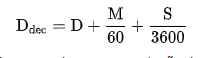

In [3]:
def converterGraus_Metros(Graus, Minutos, Segundos):
  # Fórmula completa encontra-se abaixo, mas por se tratar de distâncias menores, foi apenas considerado os segundos
  #return ((Graus * 60) + (Minutos) + (Segundos / 60)) * 1852
  return (Segundos / 60) * 1852

In [4]:
def subtrairGraus(Inicial, Final):
  GrausInicial, MinutosInicial, SegundosInicial = lerCoordenadasGraus(Inicial)
  GrausFinal, MinutosFinal, SegundosFinal = lerCoordenadasGraus(Final)
  # Preparando para a subtração
  if SegundosInicial < SegundosFinal:
    if MinutosInicial > 1: 
      MinutosInicial -= 1
    else:
      GrausInicial -= 1
      MinutosInicial += 59
    SegundosInicial += 60
  # Impedindo que apareça 1 minuto caso um dos minutos seja > 0.6
  if MinutosInicial < 1:
    MinutosInicial = 0
  if MinutosFinal < 1:
    MinutosFinal = 0
  return '{0:.0f}° {1}\' {2:.3f}\"'.format(float(GrausFinal - GrausInicial), int(MinutosFinal - MinutosInicial), float(SegundosFinal - SegundosInicial))

In [5]:
def truncar(x, n):
  return (((10 ** n) * x) / 10 ** n)

In [6]:
def converterCoordenadas_to_Decimal(graus, minutos, segundos):
  return (graus + (minutos/60) + (segundos/3600))

In [7]:
def converterDecimal_to_Coordenadas(CoordenadasDecimal):
  Graus = truncar(CoordenadasDecimal, 0)
  Minutos = truncar((abs(CoordenadasDecimal) * 60) % 60, 0)
  Segundos = (abs(CoordenadasDecimal) * 3600) % 60
  return '{0:.0f}° {1}\' {2:.3f}\"'.format(Graus, int(Minutos), Segundos)

In [8]:
def lerCoordenadasGraus(CoordenadasGrau):
  Coordenadas = CoordenadasGrau.replace(' ', '')
  indexGraus = []
  indexMinutos = []
  indexSegundos = []
  GrausPreenchido = False
  MinutosPreenchido = False
  SegundosPreenchido = False
  i = 0
  while i < len(Coordenadas):
    caracter = Coordenadas[i]
    if not (caracter.isdigit()) and not (caracter == '-') and not (caracter == '.'):
      if not (GrausPreenchido):
        indexGraus.append(0)
        indexGraus.append(i)
        GrausPreenchido = True
      elif not (MinutosPreenchido):
        indexMinutos.append(indexGraus[1] + 1)
        indexMinutos.append(i)
        MinutosPreenchido = True
      elif not (SegundosPreenchido):
        indexSegundos.append(indexMinutos[1] + 1)
        indexSegundos.append(i)
        SegundosPreenchido = True
    i += 1
  Graus = float(Coordenadas[indexGraus[0]:indexGraus[1]])
  Minutos = float(Coordenadas[indexMinutos[0]:indexMinutos[1]])
  Segundos = float(Coordenadas[indexSegundos[0]:indexSegundos[1]])
  return Graus, Minutos, Segundos

In [9]:
def calcularDistancia_DoisPontos(CoordenadasInicial, CoordenadasFinal):
  # Corrigindo a ordem das coordenadas
  if (CoordenadasInicial[0] > CoordenadasFinal[0] and CoordenadasInicial[1] > CoordenadasFinal[1]):
    La1 = CoordenadasFinal[0]
    La2 = CoordenadasInicial[0]
    Lo1 = CoordenadasFinal[1]
    Lo2 = CoordenadasInicial[1]
  elif CoordenadasInicial[0] < CoordenadasFinal[0] and CoordenadasInicial[1] > CoordenadasFinal[1]:
    La1 = CoordenadasInicial[0]
    La2 = CoordenadasFinal[0]
    Lo1 = CoordenadasFinal[1]
    Lo2 = CoordenadasInicial[1]
  elif CoordenadasInicial[0] > CoordenadasFinal[0] and CoordenadasInicial[1] < CoordenadasFinal[1]:
    La1 = CoordenadasFinal[0]
    La2 = CoordenadasInicial[0]
    Lo1 = CoordenadasInicial[1]
    Lo2 = CoordenadasFinal[1]
  else:
    La1 = CoordenadasInicial[0]
    La2 = CoordenadasFinal[0]
    Lo1 = CoordenadasInicial[1]
    Lo2 = CoordenadasFinal[1]
  Latitude = [La1, La2]
  Longitude = [Lo1, Lo2]
  # Dicionário que armazena Latitudes e Longitudes em forma de Graus
  Coordenadas = {'Latitude':[converterDecimal_to_Coordenadas(Latitude[0]), converterDecimal_to_Coordenadas(Latitude[1])], 'Longitude':[converterDecimal_to_Coordenadas(Longitude[0]), converterDecimal_to_Coordenadas(Longitude[1])]}
  # Subtração das distâncias
  distanciaLatitude = subtrairGraus(Coordenadas['Latitude'][0], Coordenadas['Latitude'][1])
  distanciaLongitude = subtrairGraus(Coordenadas['Longitude'][0], Coordenadas['Longitude'][1])
  # Conversão em metros
  Graus, Minutos, Segundos = lerCoordenadasGraus(distanciaLatitude)
  a = abs(converterGraus_Metros(Graus, Minutos, Segundos))
  Graus, Minutos, Segundos = lerCoordenadasGraus(distanciaLongitude)
  b = abs(converterGraus_Metros(Graus, Minutos, Segundos))
  return (a**2 + b**2)**(1/2)

In [10]:
def converterMetros_Graus(Metros):
  Graus = 0
  Minutos = 0
  Segundos = 0.033 * Metros
  return converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)

In [11]:
PosicaoInicial = 30
PosicaoFinal = 50
if PosicaoFinal > PosicaoInicial:
  subtracao = subtrairGraus(converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoFinal)), converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoInicial)))
else:
  subtracao = subtrairGraus(converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoInicial)), converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoFinal)))
Graus, Minutos, Segundos = lerCoordenadasGraus(subtracao)
print(int(converterGraus_Metros(Graus, Minutos, Segundos) * -1))

20


In [12]:
def converterIntervalosMetros(metros):
  return converterMetros_Graus(metros)

In [65]:
def simularPontos(vezes, quantidadeFuncionarios, ladoMetros):
  # Armazenamento dos resultados
  ResultadoSucessos = []
  ResultadoFalhas = []
  TamanhoMetros = [ladoMetros for x in range(vezes)]
  MetrosQuadrados = [ladoMetros**2 for x in range(vezes)]
  Latitude = []
  Longitude = []
  # Criando espaço
  intervaloLatLong = converterIntervalosMetros(ladoMetros)
  CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
  for n in tqdm(range(vezes)): 
    ConjuntoCoordenadas = criarCoordenadas(quantidadeFuncionarios, intervaloLatLong) 
    ConjuntoCoordenadas.to_csv('/content/CoordenadasSimuladas/{0}_{1}.csv'.format(n, vezes), index=False)
    Sucessos = int()
    Falhas = int()
    for ponto in ConjuntoCoordenadas.values.tolist():
      #Latitude.append(ponto[0])
      #Longitude.append(ponto[1])
      if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
        Sucessos += 1
      else:
        Falhas += 1
    ResultadoSucessos.append(Sucessos)
    ResultadoFalhas.append(Falhas)
  #ResultadoTeste = {'Sucessos': ResultadoSucessos, 'Falhas': ResultadoFalhas, 'Latitude': Latitude, 'Longitude': Longitude,'TamanhoLado': TamanhoMetros, 'MetrosQuadrados': MetrosQuadrados}
  ResultadoTeste = {'Sucessos': ResultadoSucessos, 'Falhas': ResultadoFalhas,'TamanhoLado': TamanhoMetros, 'MetrosQuadrados': MetrosQuadrados}
  return pd.DataFrame(ResultadoTeste)

# Teste visual

Sucessos: 7
Falhas: 3


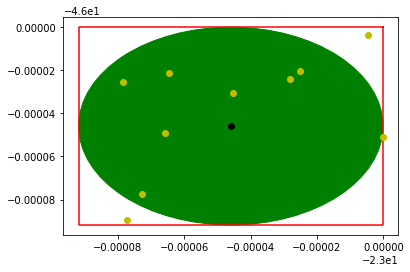

In [ ]:
intervaloLatLong = converterIntervalosMetros(10)
ConjuntoCoordenadas = criarCoordenadas(10, intervaloLatLong)

CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
circulo = plt.Circle(CirculoConfig['coordenadas'], CirculoConfig['raio'], color='g', fill=True)

fig, ax = plt.subplots()

ax.plot((-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2), 'o', color='black')
ax.plot([-23.0000001,-23.0000001 - intervaloLatLong, -23.0000001 - intervaloLatLong, -23.0000001, -23.0000001],[-46.0000001,-46.0000001, -46.0000001 - intervaloLatLong, -46.0000001 - intervaloLatLong, -46.0000001], '-', color='r')
ax.plot(ConjuntoCoordenadas['latitude'], ConjuntoCoordenadas['longitude'], 'o', color='y')
ax.add_artist(circulo)

ConjuntoCoordenadas.head(5)
Sucessos = int()
Falhas = int()
for ponto in ConjuntoCoordenadas.values.tolist():
  if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
    Sucessos += 1
  else:
    Falhas += 1
print('Sucessos: {0}\nFalhas: {1}'.format(Sucessos, Falhas))

# Simulação

100%|██████████| 12/12 [00:00<00:00, 377.19it/s]


Quantidade de testes: 12
Média de sucessos: 79.75
Média de falhas: 20.25


(array([1., 0., 0., 0., 1., 0., 5., 2., 2., 1.]),
 array([68. , 69.8, 71.6, 73.4, 75.2, 77. , 78.8, 80.6, 82.4, 84.2, 86. ]),
 <a list of 10 Patch objects>)

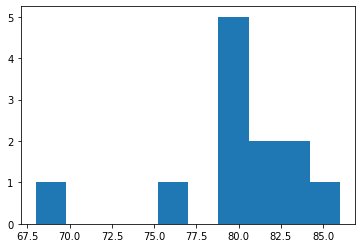

In [63]:
vezes = 12
df = simularPontos(vezes, quantidadeFuncionarios=100, ladoMetros=100)
print('\nQuantidade de testes: {0}\nMédia de sucessos: {1}\nMédia de falhas: {2}'.format(vezes,df['Sucessos'].mean(), df['Falhas'].mean()))
plt.hist(df['Sucessos'])

In [35]:
df.query('Sucessos == 0 or Falhas == 0')

,Sucessos,Falhas,TamanhoLado,MetrosQuadrados
